In [1]:
import numpy as np
import matplotlib.pyplot as plt
from find_closest_pair import *
from quick_sort_class import *
from bitstring import BitArray
from time import time
%matplotlib inline

In [2]:
def read_locations(filename):
    
    with open(filename,"r") as f:
        locs = []
        count = 0
        for line in f:
            if count < 1:
                count += 1
                continue
            #if count > 13:
             #   break
            
            line = line.split(" ")
            locs.append((float(line[0]),float(line[1])))
            count += 1
    return locs
locs = read_locations("assignment_2_5.txt")
#locs = read_locations("assignment_2_5_test.txt")

In [3]:
#locs = read_locations("assignment_2_5_test.txt")
x_sorted = locs[:]
Quick_Sort(x_sorted,0)
y_sorted = locs[:]
Quick_Sort(y_sorted,1)

In [4]:
def combinations(m,start,end,comb = None):
    if comb == None:
        comb = []
        
    if m == 1:
        for i in xrange(start,end-m+1):
            comb.append(i)
            #comb[i] = 1
            yield comb
            comb.pop() 
            #comb[i] = 0
            
    else:
        for i in xrange(start,end-m+1):
            comb.append(i)
            #comb[i] = 1
            for out in combinations(m-1,i+1,end,comb):
                yield out
            comb.pop()
            #comb[i] = 0
for s in combinations(2,0,3):
    print s


[0, 1]
[0, 2]
[1, 2]


In [5]:
def closest_pair_brute(points,given = None):    
    
    n = len(points)
    if n < 2:
        return None,float("inf")
    
    if given != None:
        closest_pair = [points[given-1],points[given]]
        min_dist = dist(points[given-1],points[given])
    else:
        closest_pair = [points[0],points[1]]
        min_dist = dist(points[0],points[1])
    
    
    if given != None:
        for i in [i for i in range(n) if i != given]:
            d = dist(points[i],points[given])
            if d < min_dist:
                closest_pair = [points[i],points[given]]
                min_dist = d
    else:
        for i in range(n):
            for j in range(i+1,n): 
                d = dist(points[i],points[j])
                if d < min_dist:
                    closest_pair = [points[i],points[j]]
                    min_dist = d
    
    return closest_pair,min_dist

In [6]:
def reconstruct_path(points,B,dest,last_point):
    n = len(points)
    
    path = []
    path.append(dest)
    index = BitArray(bin = "1"*n)
    to_p = last_point
    d = dist(points[dest],points[last_point])
    while True:
        #print index
        path.append(to_p)
        if index.bin in B[to_p]:
            from_p = B[to_p][index.bin]
            if from_p == to_p:
                path.append(from_p)
                break
            d += dist(points[to_p],points[from_p])
            x,y = zip(*[points[from_p],points[to_p]])
            plt.plot(x,y,color = "red")
            index[to_p] = 0
            #print index
            to_p = from_p
        else:
            print "Hello"
            #print B[to_p],index.uint,index.bin
            break
    
    print d
    return path[::-1]

In [7]:
def shortest_tour(in_points,start_source = 0,dest = 0):
    n = len(in_points)
    print "Number of points is",n
    print "\nSource is",start_source
    print "\nDestination is",dest,"\n"
    
    if start_source != 0:
        points = in_points[start_source:] + in_points[:start_source]
        dest -= start_source
        source = 0
    else:
        source = start_source
        points = in_points
    
    index = BitArray(bin = "0"*n)
    index[source] = 1
    
    A = [[],[]]
    B = []
    
    for _ in xrange(n):
        A[0].append({})
        A[1].append({})
        B.append({})
        
    A[0][0][index.bin] = 0
    #print A[0]
    B[0][index.uint] = 0

    for m in xrange(1,n):
        t1 = time()
        print "m is",m
        ind = m % 2
        #print ind
        
        #for S in combinations(m,source+1,n):
        for S in combinations(m,1,n):
            index = BitArray(bin = "0"*n)
            index[0] = 1
            #print "\nS is",S
            
            for i in S:
                index[i] = 1
            #print "S_index",index.bin
            
            S_index = index.bin
            for j in S:#[j for j in S if j != source]:
                min_path = float('inf')
                #print "j is",j
                index[j] = 0
                #print index.bin
                
                
                for k in [k for k in S+[source] if k != j]:
                    #print "k is",k
                    d = dist(points[k],points[j])
                    #print "d is",d
                    if index.bin in A[ind-1][k]:
                        new_path = A[ind-1][k][index.bin] + d
                    else: 
                        #print "Not found",index.bin
                        new_path = float("inf")
                    
                    if new_path < min_path:
                        #print index.bin
                        min_path = new_path
                        A[ind][j][S_index] = new_path
                        B[j][S_index] = k
                        #del A[ind-1][k][index.uint]
                        
                index[j] = 1
        print A[ind]
        for j in A[ind-1]:
            j.clear()
        
        print "It took %f seconds"%(time()-t1)
        
        
    index = BitArray(bin = "1"*n)   
        #print A[ind]
    if dest != source:
        #print A[ind][dest-source]
        if index.bin in A[ind][dest]:
            min_path = A[ind][dest][index.bin]
            last_point = dest
        else:
            print dest,A[ind][dest],A[ind][n-1]
    else:
        min_path = float('inf')
        for j in xrange(1,n):

            d = dist(points[dest],points[j])
            #print "d is",d
        
            if index.bin in A[ind][j]:
                new_path = A[ind][j][index.bin] + d
            else:
                new_path = float("inf")
            
            if new_path < min_path:
                #print "Hello"
                min_path = new_path
                last_point = j
                x,y = zip(*[points[dest],points[j]])
        plt.plot(x,y,color = "green")
    
    path_loc = reconstruct_path(points,B,dest,last_point)
    path = []
    for loc in path_loc:
        path.append(points[loc])
    
    return path,min_path

In [8]:
cluster_1 = [loc for loc in x_sorted if loc[0]<25000]
cluster_2 = [loc for loc in x_sorted if loc[0]>25000]

Number of points is 13

Source is 0

Destination is 1 

m is 1
[{}, {'1100000000000': 74.535614157126972}, {'1010000000000': 4109.9134598891233}, {'1001000000000': 973.53881735085042}, {'1000100000000': 3047.9957068357057}, {'1000010000000': 2266.9117313600418}, {'1000001000000': 4190.1007993709281}, {'1000000100000': 3301.8933962198112}, {'1000000010000': 4757.7421976068536}, {'1000000001000': 3044.3481805543315}, {'1000000000100': 3094.9780544904979}, {'1000000000010': 3986.2611491081325}, {'1000000000001': 5092.5054300958363}]
It took 0.003076 seconds
m is 2
[{}, {'1110000000000': 8179.6186089140519, '1101000000000': 1874.1559107312123, '1100100000000': 6047.4864367578539, '1100000001000': 6014.2434579822921, '1100000000100': 6115.6476152924679, '1100001000000': 8327.4980481789826, '1100000100000': 6540.4201643317847, '1100000000010': 7900.0899259511425, '1100000010000': 9459.1013265065922, '1100010000000': 4480.5060934779085, '1100000000001': 10116.254630422003}, {'1110000000000': 

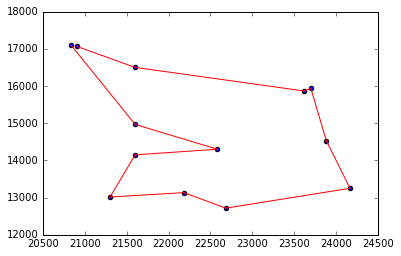

In [ ]:
x,y = zip(*cluster_1)
plt.scatter(x,y)
_,min_path1 = shortest_tour(cluster_1,0,1)
print min_path1

In [ ]:
x,y = zip(*cluster_1)
plt.scatter(x,y)
_,min_path1 = shortest_tour(cluster_1,5,5)
print min_path1

In [94]:
locs = read_locations("assignment_2_5_test.txt")
x_sorted = locs[:]
Quick_Sort(x_sorted,0)
y_sorted = locs[:]
Quick_Sort(y_sorted,1)

Number of points is 5

Source is 1

Destination is 0 

m is 1
[{}, {'11000': 1.1180339887498949}, {'10100': 2.2360679774997898}, {'10010': 1.5}, {'10001': 2.2360679774997898}]
It took 0.001231 seconds
m is 2
[{}, {'11100': 3.3541019662496847, '11010': 2.9142135623730949, '11001': 4.0388436152317846}, {'11100': 2.2360679774997898, '10101': 4.2360679774997898, '10110': 3.5615528128088303}, {'10011': 5.4376300962162141, '11010': 2.5322475511229898, '10110': 4.2976207903086205}, {'11001': 2.9208096264818897, '10101': 4.2360679774997898, '10011': 4.7015621187164243}]
It took 0.002927 seconds
m is 3
[{}, {'11110': 4.6795868015587256, '11101': 5.3541019662496847, '11011': 6.5043377564484191}, {'11110': 4.0322475511229898, '11101': 4.9208096264818897, '10111': 6.7015621187164243}, {'11110': 4.2976207903086205, '11011': 5.4530571776048795, '10111': 6.2976207903086205}, {'11101': 4.2360679774997898, '11011': 4.7169892001050897, '10111': 5.5615528128088307}]
It took 0.003300 seconds
m is 4
[{}, {

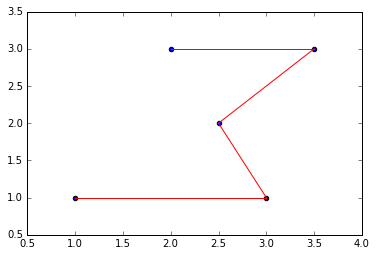

In [101]:
x,y = zip(*x_sorted)
plt.scatter(x,y)
tour,min_path = shortest_tour(x_sorted,1,0)
#for i in xrange(1,len(x_sorted)):
 #   tour,min_path1 = shortest_tour(x_sorted,i,i)
  #  if min_path != min_path1:
   #     print "To bad!"
print "\nMin tour is",min_path
print tour